In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load libraries and sample data

In [23]:
import pandas as pd
import numpy as np
from utils.backtester import BackTester
from strategies.buy_hold import BuyHoldStrategy

# Load sample data
data = pd.read_pickle('data/raw/price/SPY_20250130.pkl')
data.set_index('Date', inplace=True)
# data.index = pd.to_datetime(data.index, format="mixed")
price_data = {"SPY": data}





# Run backtester

Buy and Hold Results: {'cagr': 0.10530552260327819, 'volatility': 0.18651496743660248, 'sharpe': 0.5645955606167218, 'max_drawdown': 0.5517751779488461, 'cumulative_returns': 23.55992498028308}


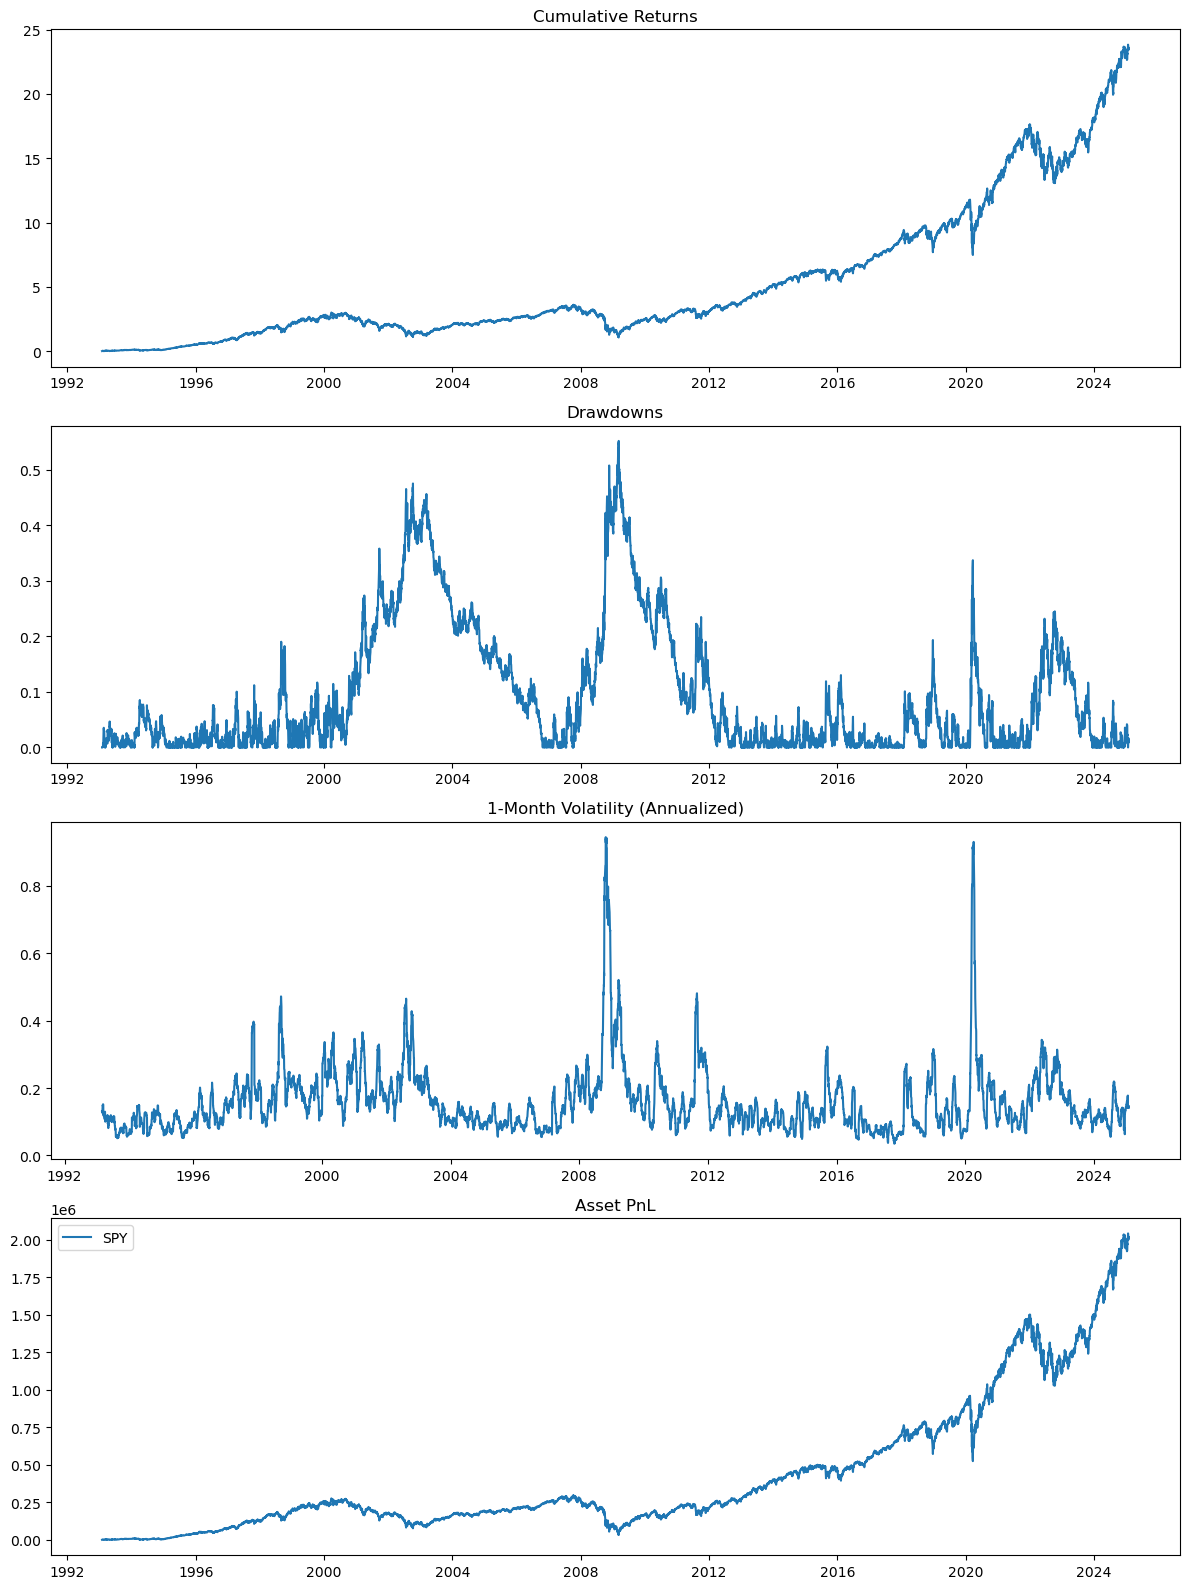

In [24]:
# Initialize backtester
bt = BackTester(price_data)

# Example 1: Buy and Hold
bt.add_strategy(BuyHoldStrategy, tickers=['SPY'], price_data=price_data)
results = bt.backtest()
print("Buy and Hold Results:", {k: v for k, v in results.items() if k != 'returns'})
bt.plot_results()

# Compare results against returns directly from adjclose

In [25]:
df = pd.read_pickle('./data/raw//price/SPY_20250130.pkl')
df['return'] = df['adjclose'].pct_change()
df.loc[df.index[0], 'return'] = 0
df['cumulative_return'] = (df['return'] + 1).cumprod() - 1

print("backtester results")
print(f"cagr:           {results['cagr']}")
print(f"volatility:     {results['volatility']}")
print(f"max drawdown:   {results['max_drawdown']}")
print('---')
print("adjclose results")
print(f"cagr:           {(df['cumulative_return'].iloc[-1] + 1) ** (252 / df.shape[0]) - 1}")
print(f"volatility:     {df['return'].std() * np.sqrt(252)}")
df['drawdown'] = (df['adjclose'].cummax() - df['adjclose']) / df['adjclose'].cummax()
print(f"max drawdown:   {df['drawdown'].max()}")

backtester results
cagr:           0.10530552260327819
volatility:     0.18651496743660248
max drawdown:   0.5517751779488461
---
adjclose results
cagr:           0.10533828398890632
volatility:     0.18595808492613541
max drawdown:   0.551894415016353
